In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [38]:
df = pd.read_csv("../Titanic-Dataset.csv")

## Basic Overview of Data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns   #Checking if any duplicate columns in dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.duplicated().sum()  #Checking if any duplicate rows in dataset

0

## Handling Null values

In [9]:
df.isnull().sum()  #Checking if any null values in dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
## Here we can see 3 features have null values

In [40]:
df.isnull().sum()/len(df)*100  # Percentage of null of values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [42]:
## Filling Age null values

df['Age'] = df['Age'].fillna(df['Age'].mean())  # Imputing mean values to fill null values of Age feature

In [44]:
# Column Cabin has alot of null value so we decided to drop from dataset

df.drop('Cabin', axis=1, inplace=True)

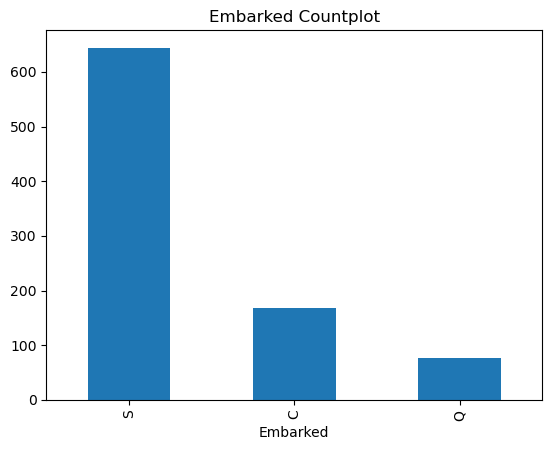

In [46]:
# Since Embarked column is not a nulber we can't use mean or median to fill null values
# Where:
# S → Southampton (United Kingdom)
# Q → Queenstown (Ireland)
# C → Cherbourg (France)

df['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarked Countplot')
plt.show()

In [48]:
## We're filling with mode, i.e most frequent value
# Here mode is 'S', we can see from barPlot

df['Embarked'] = df['Embarked'].fillna('S')

In [50]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.025,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.900,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.000,S
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.050,S


## Handling Highly Correlated values

<Axes: >

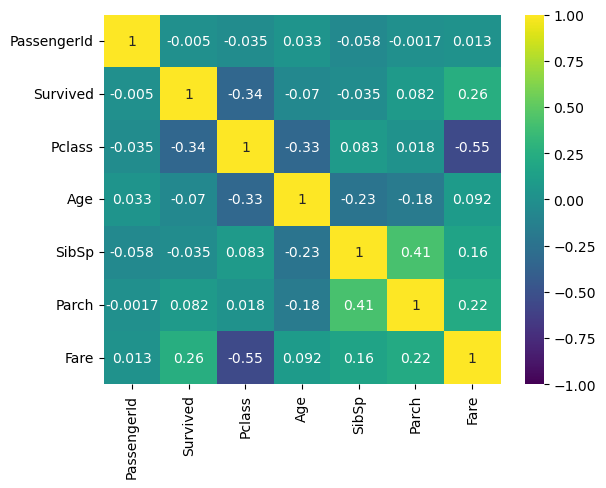

In [31]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', vmin=-1, vmax=1)

In [15]:
# Here we can see Feature 'Survived' and 'Fare' is correlated +vely, indicates as Fare increases the chances of survival increases too.
# Here we can see Feature 'Pclass' and 'Fare' is correalted -vely, shows the lower no. for your class will be higher changes of survival and vice versa
# Here we can see Feature 'Pclass' and 'Survived' is correalted -vely, shows the lower no. for your class will be higher will be fare and vice versa

# Thus there's no higly correlatred features in dataset

## Handling Outliers

PassengerId


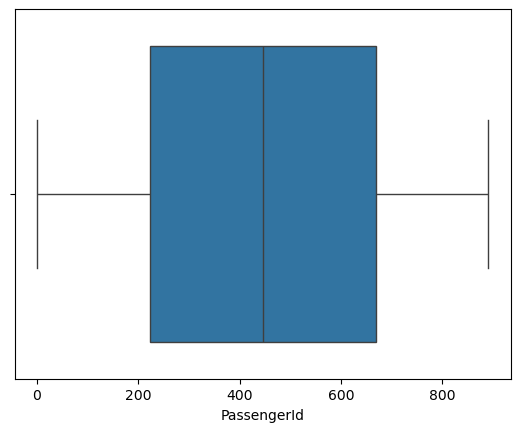

Survived


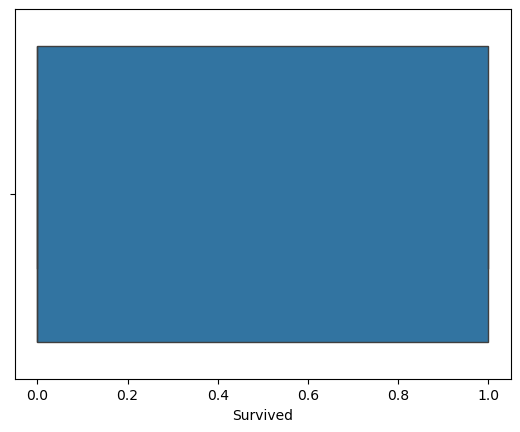

Pclass


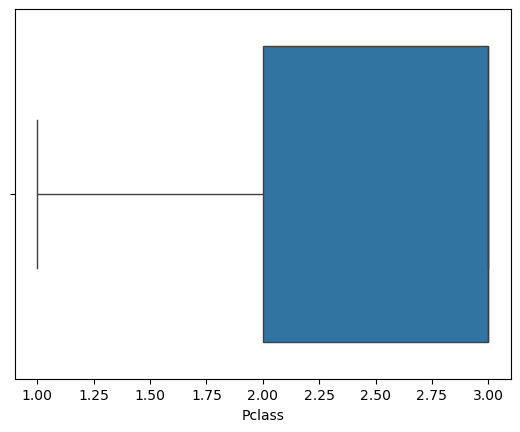

Age


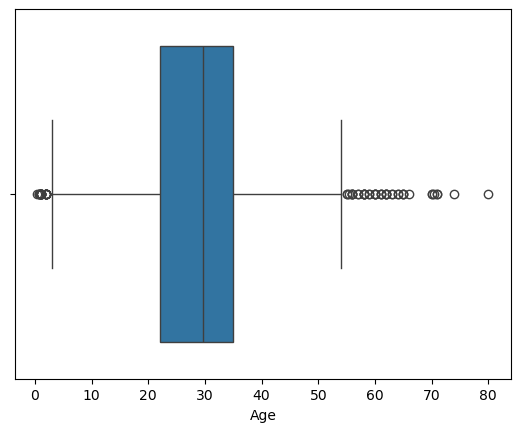

SibSp


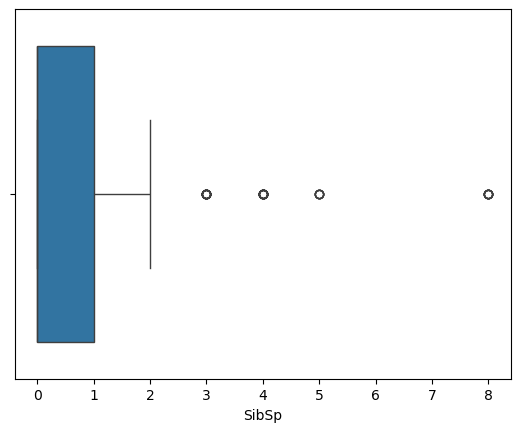

Parch


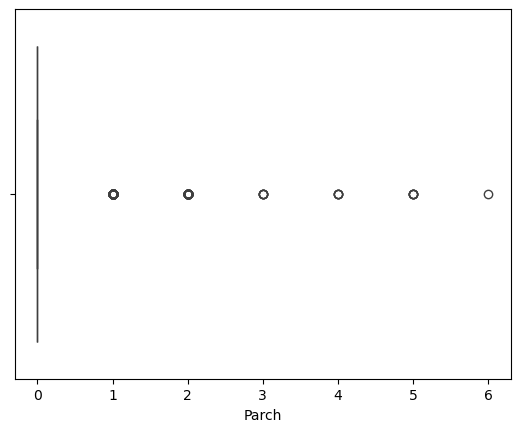

Fare


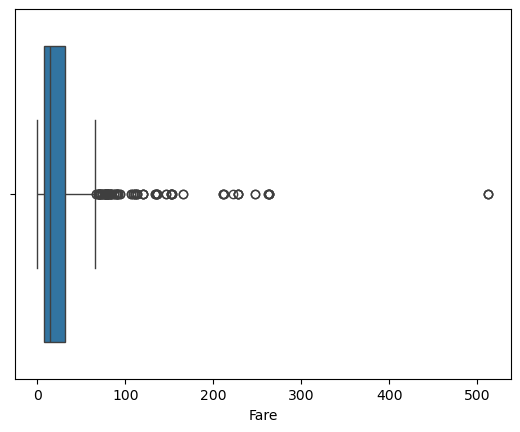

In [52]:
## Box plot to indetify outiers

for col in df.select_dtypes('number').columns:
    print(col)
    sns.boxplot(df, x=col)
    plt.show()

In [54]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1-iqr*1.5
upper_whisker = q3+iqr*1.5

In [56]:
## Defining outliers as upper whisker to balance distribution

df['Fare'][df['Fare'] > upper_whisker] = upper_whisker

C:\Users\RAJ\AppData\Local\Temp\ipykernel_23936\1653582179.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Fare'][df['Fare'] > upper_whisker] = upper_whisker
C:\Users\RAJ\AppData\Local\Temp\ipykernel_23936\1653582179.py:3: SettingWit

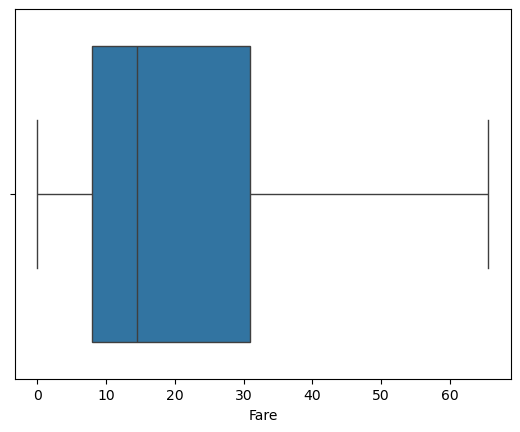

In [62]:
sns.boxplot(df, x=df['Fare'])
plt.show()

## we can outliers are now can't be seen

## Handling irrelevant Data

In [66]:
# Here 'PassengerId', 'Name' and 'Ticket' doest play a role to decide weather person can survive 

df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [68]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,65.6344,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


## Handling Textual Data

In [70]:
## ML algorithms need numerical data not textual, so we're just conveting them into numeric form

pd.get_dummies(df, dtype=int, drop_first=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,65.6344,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [72]:
df = pd.get_dummies(df, dtype=int, drop_first=True)

### Input and Output

In [74]:
X = df.drop('Survived', axis=1)
y = df['Survived']

## Train Test Split

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [77]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
57,3,28.500000,0,0,7.2292,1,0,0
717,2,27.000000,0,0,10.5000,0,0,1
431,3,29.699118,1,0,16.1000,0,0,1
633,1,29.699118,0,0,0.0000,1,0,1
163,3,17.000000,0,0,8.6625,1,0,1
...,...,...,...,...,...,...,...,...
369,1,24.000000,0,0,65.6344,0,0,0
320,3,22.000000,0,0,7.2500,1,0,1
527,1,29.699118,0,0,65.6344,1,0,1
125,3,12.000000,1,0,11.2417,1,0,0


### Logistic Regression Model

In [80]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Model Training
lr.fit(X_train, y_train)

C:\Users\RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred = lr.predict(X_test)

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       117
           1       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



## Predicting Survival

In [79]:
Pclass= float(input('Please enter Pclass here: '))
Age= float(input('Please enter Age here: '))
SibSp= float(input('Please enter SibSp here: '))
Parch= float(input('Please enter Parch here: '))
Fare= float(input('Please enter Fare here: '))
Sex_male= float(input('Please enter Sex_male here: '))
Embarked_Q= float(input('Please enter Embarked_Q here: '))
Embarked_S= float(input('Please enter Embarked_S here: '))
user_input = [[Pclass, Age, SibSp, Parch, Fare, Sex_male,
       Embarked_Q, Embarked_S]]


if lr.predict(user_input) == 0:
    print('RIP!!, your wont survive Titanic')
else:
    print('Yes!! you will survive Titanic')

Please enter Pclass here:  2
Please enter Age here:  90
Please enter SibSp here:  0
Please enter Parch here:  0
Please enter Fare here:  32
Please enter Sex_male here:  0
Please enter Embarked_Q here:  0
Please enter Embarked_S here:  0


Yes!! you will survive Titanic


C:\Users\RAJ\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
